In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from numpy import log
from pandas import Series

import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [7]:
# importing dataset
df = pd.read_csv('NIFTY50_all (1).csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [14]:
# Number of unique companies
df['Symbol'].nunique()

65

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [18]:
df['Date']=pd.to_datetime(df['Date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                235192 non-null  datetime64[ns]
 1   Symbol              235192 non-null  object        
 2   Series              235192 non-null  object        
 3   Prev Close          235192 non-null  float64       
 4   Open                235192 non-null  float64       
 5   High                235192 non-null  float64       
 6   Low                 235192 non-null  float64       
 7   Last                235192 non-null  float64       
 8   Close               235192 non-null  float64       
 9   VWAP                235192 non-null  float64       
 10  Volume              235192 non-null  int64         
 11  Turnover            235192 non-null  float64       
 12  Trades              120344 non-null  float64       
 13  Deliverable Volume  219115 no

In [24]:
print(df['Date'].min())
print(df['Date'].max())

2000-01-03 00:00:00
2021-04-30 00:00:00


In [26]:
df['Symbol'].value_counts()

Symbol
IOC           5306
CIPLA         5306
M&M           5306
ICICIBANK     5306
ONGC          5306
              ... 
MUNDRAPORT    1023
TELCO          999
KOTAKMAH       502
SSLT           388
JSWSTL         123
Name: count, Length: 65, dtype: int64

In [31]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [34]:
df=df[['Date','Symbol','Open','High','Low','Close','VWAP','Volume']]

In [36]:
df.head(3)

,Date,Symbol,Open,High,Low,Close,VWAP,Volume
0,2007-11-27,MUNDRAPORT,770.0,1050.00,770.0,962.9,984.72,27294366
1,2007-11-28,MUNDRAPORT,984.0,990.00,874.0,893.9,941.38,4581338
2,2007-11-29,MUNDRAPORT,909.0,914.75,841.0,884.2,888.09,5124121


In [38]:
df.duplicated().sum()

0

In [42]:
# Durbin Watson Test
import statsmodels.api as sm
sm.stats.durbin_watson(df['VWAP'])

0.0014277598023373546

In [46]:
print(sm.stats.durbin_watson(df['Open']))
print(sm.stats.durbin_watson(df['Close']))

0.0015870073457078119
0.0015201473988800853


In [48]:
df.nunique()

Date        5306
Symbol        65
Open       44298
High       49036
Low        51335
Close      63739
VWAP      138831
Volume    220434
dtype: int64

In [50]:
df.describe()

,Date,Open,High,Low,Close,VWAP,Volume
count,235192,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05
mean,2011-05-22 13:18:08.975815680,1267.759708,1286.581440,1247.488465,1266.554351,1267.13230,3.045903e+06
min,2000-01-03 00:00:00,8.500000,9.750000,8.500000,9.150000,9.21000,3.000000e+00
25%,2006-07-03 00:00:00,275.000000,279.500000,269.600000,274.350000,274.69750,2.190095e+05
50%,2011-08-19 00:00:00,567.025000,576.900000,556.500000,566.700000,566.94000,1.010938e+06
75%,2016-06-24 00:00:00,1243.312500,1263.000000,1221.650000,1242.400000,1242.66250,3.019851e+06
max,2021-04-30 00:00:00,33399.950000,33480.000000,32468.100000,32861.950000,32975.24000,4.810589e+08
std,NaN,2585.259609,2619.649216,2546.621396,2582.140942,2582.69998,7.333981e+06


In [52]:
df['Symbol'].unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

In [54]:
# Indian Oil Corporation Ltd -IOC
stock_name='IOC'
df1=df[df['Symbol']==stock_name]
df1.head()

,Date,Symbol,Open,High,Low,Close,VWAP,Volume
117186,2000-01-03,IOC,260.0,273.25,250.00,270.85,258.55,23700
117187,2000-01-04,IOC,260.0,268.00,254.10,264.40,259.80,24400
117188,2000-01-05,IOC,264.9,265.00,257.00,261.30,260.66,18900
117189,2000-01-06,IOC,258.0,263.00,256.05,260.10,259.81,18150
117190,2000-01-07,IOC,259.9,267.00,253.25,264.45,260.11,17650


In [56]:
df1.shape

(5306, 8)

In [58]:
df1['Date'].min()

Timestamp('2000-01-03 00:00:00')

In [62]:
df1['Date'].max()

Timestamp('2021-04-30 00:00:00')

<Axes: >

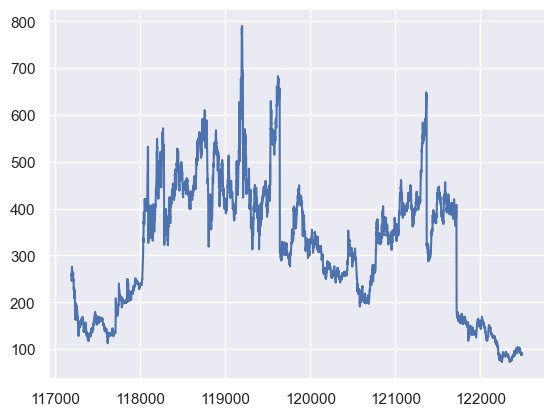

In [68]:
df1['VWAP'].plot()

In [70]:
df1['Time_Stamp']=pd.DataFrame(df1,columns=['Date'])
df1.head()

,Date,Symbol,Open,High,Low,Close,VWAP,Volume,Time_Stamp
117186,2000-01-03,IOC,260.0,273.25,250.00,270.85,258.55,23700,2000-01-03
117187,2000-01-04,IOC,260.0,268.00,254.10,264.40,259.80,24400,2000-01-04
117188,2000-01-05,IOC,264.9,265.00,257.00,261.30,260.66,18900,2000-01-05
117189,2000-01-06,IOC,258.0,263.00,256.05,260.10,259.81,18150,2000-01-06
117190,2000-01-07,IOC,259.9,267.00,253.25,264.45,260.11,17650,2000-01-07


In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5306 entries, 117186 to 122491
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5306 non-null   datetime64[ns]
 1   Symbol      5306 non-null   object        
 2   Open        5306 non-null   float64       
 3   High        5306 non-null   float64       
 4   Low         5306 non-null   float64       
 5   Close       5306 non-null   float64       
 6   VWAP        5306 non-null   float64       
 7   Volume      5306 non-null   int64         
 8   Time_Stamp  5306 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(1), object(1)
memory usage: 414.5+ KB


In [74]:
df_final=df1.set_index('Time_Stamp')
df_final.head()

,Date,Symbol,Open,High,Low,Close,VWAP,Volume
Time_Stamp,,,,,,,,
2000-01-03,2000-01-03,IOC,260.0,273.25,250.00,270.85,258.55,23700
2000-01-04,2000-01-04,IOC,260.0,268.00,254.10,264.40,259.80,24400
2000-01-05,2000-01-05,IOC,264.9,265.00,257.00,261.30,260.66,18900
2000-01-06,2000-01-06,IOC,258.0,263.00,256.05,260.10,259.81,18150
2000-01-07,2000-01-07,IOC,259.9,267.00,253.25,264.45,260.11,17650


<Axes: xlabel='Time_Stamp', ylabel='Open'>

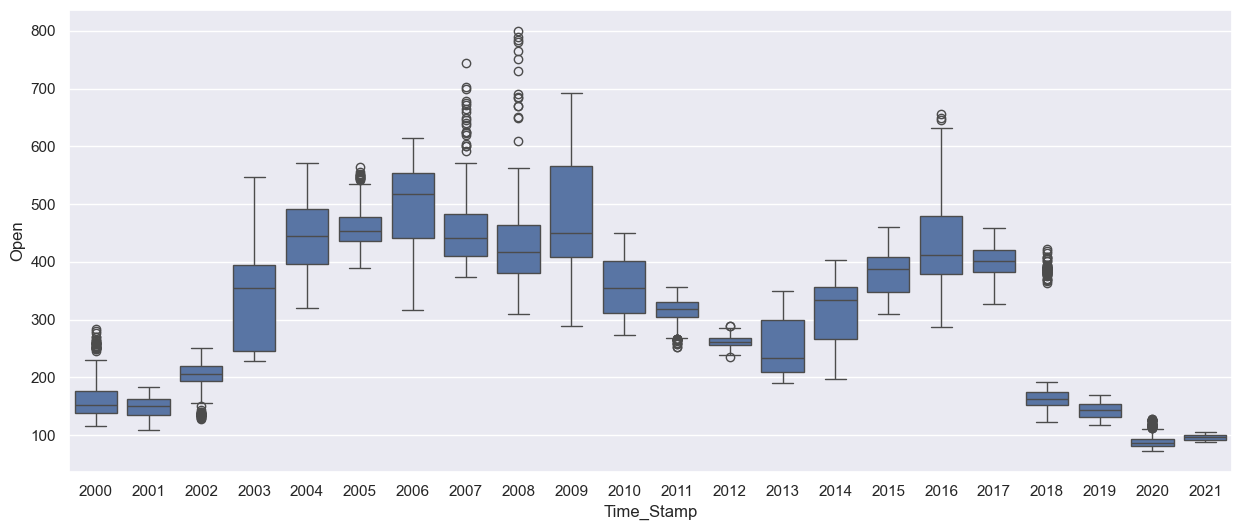

In [78]:
# Plot the boxplot of the Open/Close.VWAP/Volume with respect to the different years/months/days

plt.figure(figsize=(15,6))
sns.boxplot(x=df_final.index.year,y=df_final['Open'])

<Axes: xlabel='Time_Stamp', ylabel='Open'>

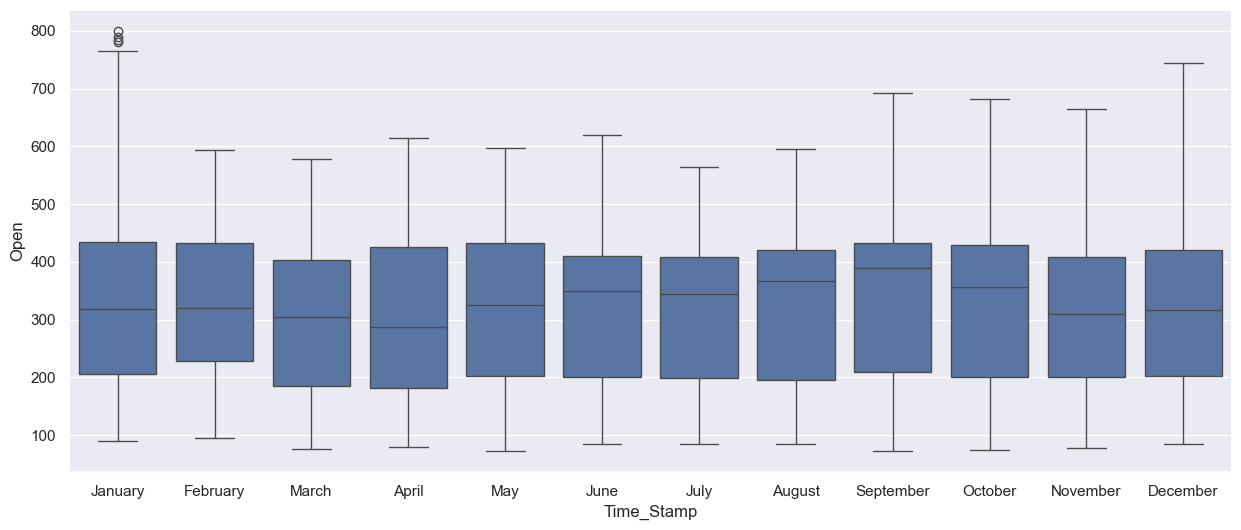

In [82]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df_final.index.month_name(),y=df_final['Open'])

<Axes: xlabel='Time_Stamp', ylabel='VWAP'>

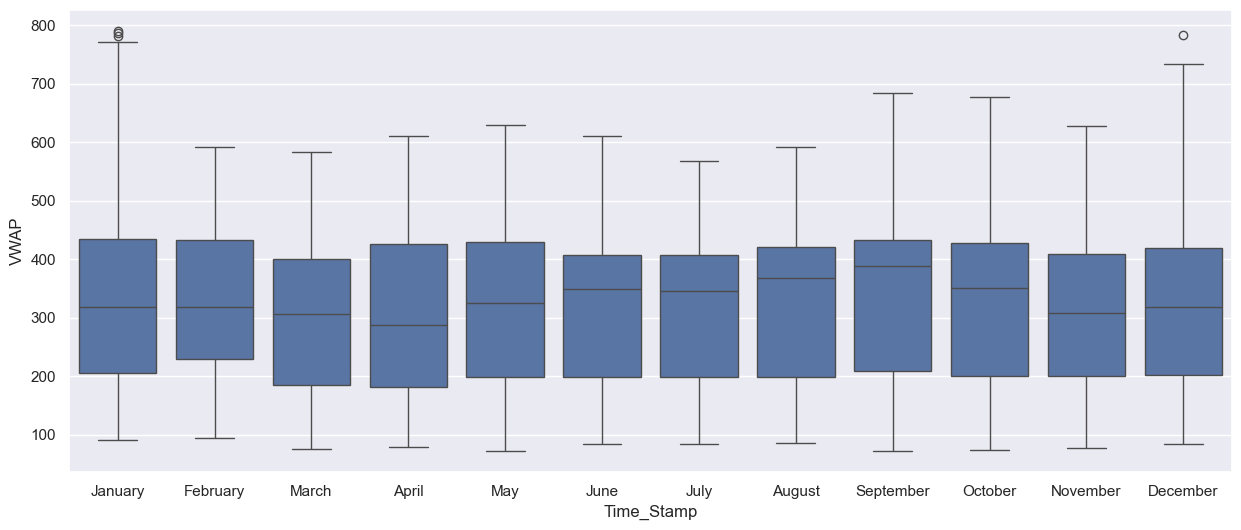

In [84]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df_final.index.month_name(),y=df_final['VWAP'])

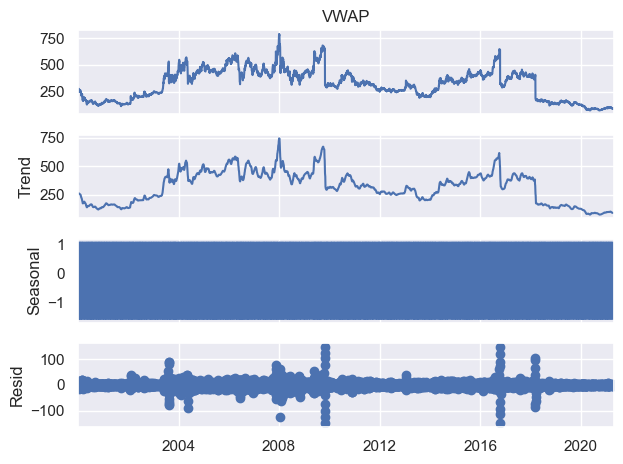

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df_final['VWAP'],period=12,model='additive')
decomposition.plot()
plt.show()

In [90]:
# Splitting the data into train and test
train=df_final[(df_final['Date']<'2015-06-30')]
train.shape

(3862, 8)

In [94]:
test=df_final[(df_final['Date']>='2015-06-30')]
test.shape

(1444, 8)

In [96]:
train.head()

,Date,Symbol,Open,High,Low,Close,VWAP,Volume
Time_Stamp,,,,,,,,
2000-01-03,2000-01-03,IOC,260.0,273.25,250.00,270.85,258.55,23700
2000-01-04,2000-01-04,IOC,260.0,268.00,254.10,264.40,259.80,24400
2000-01-05,2000-01-05,IOC,264.9,265.00,257.00,261.30,260.66,18900
2000-01-06,2000-01-06,IOC,258.0,263.00,256.05,260.10,259.81,18150
2000-01-07,2000-01-07,IOC,259.9,267.00,253.25,264.45,260.11,17650


In [106]:
train_df=train[['VWAP']]
train_df.tail()

,VWAP
Time_Stamp,
2015-06-23,394.60
2015-06-24,392.55
2015-06-25,388.07
2015-06-26,385.83
2015-06-29,385.03


In [108]:
test_df=test[['VWAP']]
test_df.head()

,VWAP
Time_Stamp,
2015-06-30,386.65
2015-07-01,392.23
2015-07-02,409.02
2015-07-03,414.19
2015-07-06,423.40


In [110]:
# Stationarity check
from statsmodels.tsa.stattools import adfuller

In [113]:
adfuller(train_df['VWAP'])

(-3.1113545018165008,
 0.0257242362454792,
 1,
 3860,
 {'1%': -3.432045247159554,
  '5%': -2.8622890672483194,
  '10%': -2.567168737751349},
 28814.639086040585)

In [117]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("*********Augmented Dickey Fuller Test : To check whether data is Stationary or not*********")
    labels = ['ADF Test stats', 'P-Value','#Lags','No of Observation']


    for i, j in zip(result, labels):
        print(j + " : -->" + str(i))
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        
        print("Weak evidence aginst null hypothesis and my time series is Non-Stationary")   

In [119]:
check_adftest(train_df)

*********Augmented Dickey Fuller Test : To check whether data is Stationary or not*********
ADF Test stats : -->-3.1113545018165008
P-Value : -->0.0257242362454792
#Lags : -->1
No of Observation : -->3860
Strong evidence against null hypothesis and my time series is Stationary


In [121]:
import itertools

In [134]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [136]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [142]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Initialize the DataFrame with columns "param" and "AIC"
dfobj = pd.DataFrame(columns=["param", "AIC"])

# Assuming 'pdq' and 'train_df' are already defined
for param in pdq:
    # Fit the ARIMA model with the given parameters
    mod = ARIMA(train_df, order=param)
    result_arima = mod.fit()
    
    # Print the AIC for the current model
    print("ARIMA{} - AIC:{}".format(param, result_arima.aic))
    
    # Append the results to the DataFrame using pd.concat
    dfobj = pd.concat([dfobj, pd.DataFrame({"param": [param], "AIC": [result_arima.aic]})], ignore_index=True)


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 0) - AIC:48327.568023176


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 1) - AIC:43343.52710583924
ARIMA(0, 1, 0) - AIC:29140.155569949948


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date inde

ARIMA(0, 1, 1) - AIC:29026.31375145466


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 0) - AIC:29149.192322554954


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 1) - AIC:29033.088217657474
ARIMA(1, 1, 0) - AIC:29028.243949175194


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date inde

ARIMA(1, 1, 1) - AIC:29028.20412267252


In [144]:
dfobj

,param,AIC
0,"(0, 0, 0)",48327.568023
1,"(0, 0, 1)",43343.527106
2,"(0, 1, 0)",29140.155570
3,"(0, 1, 1)",29026.313751
4,"(1, 0, 0)",29149.192323
5,"(1, 0, 1)",29033.088218
6,"(1, 1, 0)",29028.243949
7,"(1, 1, 1)",29028.204123


In [146]:
dfobj.sort_values(by=['AIC'])

,param,AIC
3,"(0, 1, 1)",29026.313751
7,"(1, 1, 1)",29028.204123
6,"(1, 1, 0)",29028.243949
5,"(1, 0, 1)",29033.088218
2,"(0, 1, 0)",29140.155570
4,"(1, 0, 0)",29149.192323
1,"(0, 0, 1)",43343.527106
0,"(0, 0, 0)",48327.568023


In [148]:
# (0, 1, 1)	29026.313751
mod=ARIMA(train_df,order=(0,1,1))
result_arima=mod.fit()
print(result_arima.summary())

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                   VWAP   No. Observations:                 3862
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -14511.157
Date:                Tue, 12 Nov 2024   AIC                          29026.314
Time:                        00:11:33   BIC                          29038.831
Sample:                             0   HQIC                         29030.759
                               - 3862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1736      0.005     34.264      0.000       0.164       0.184
sigma2       107.6501      0.207    519.262      0.000     107.244     108.056
Ljung-Box (L1) (Q):                   0.00   Jarque-

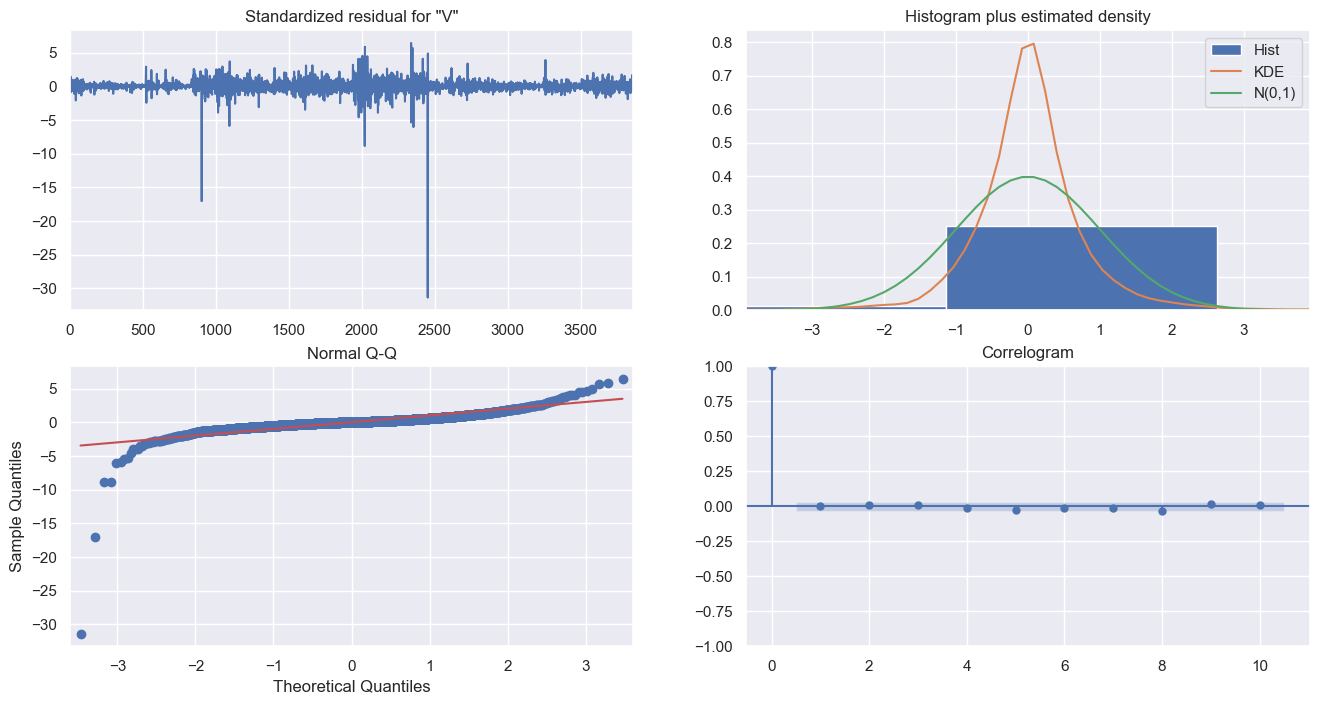

In [150]:
result_arima.plot_diagnostics(figsize=(16,8))
plt.show()

In [152]:
final_hat_avg = test_df.copy()
pred_ARIMA = result_arima.forecast(steps=len(test_df))
pred_ARIMA

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



3862    384.938901
3863    384.938901
3864    384.938901
3865    384.938901
3866    384.938901
           ...    
5301    384.938901
5302    384.938901
5303    384.938901
5304    384.938901
5305    384.938901
Name: predicted_mean, Length: 1444, dtype: float64

In [154]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_df, pred_ARIMA, squared=False))
print(rmse)

14.061820708613775


In [156]:
resutldf = pd.DataFrame({'Test RMSE': rmse}, index = ['ARIMA(0,1,1)'])
resutldf

,Test RMSE
"ARIMA(0,1,1)",14.061821


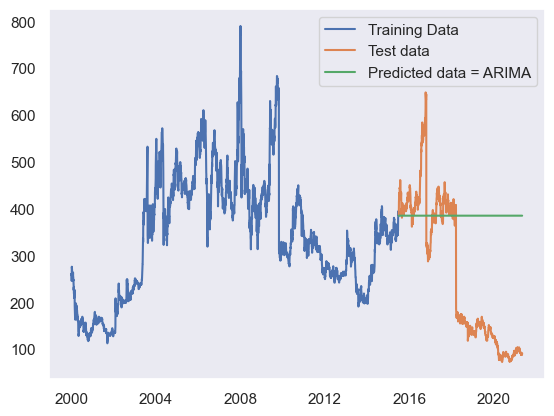

In [158]:
plt.plot(train_df, label = "Training Data")
plt.plot(test_df, label ='Test data')
plt.plot(test_df.index, pred_ARIMA, label="Predicted data = ARIMA")
plt.legend(loc='best')
plt.grid()

In [160]:
dfobj2 = pd.DataFrame(columns = ['param','seasonal','AIC'])
dfobj2

,param,seasonal,AIC


In [162]:
ex_train = train[[ 'Open', 'Close', 'High', 'Low', 'Volume']]
ex_test = test[[ 'Open', 'Close', 'High', 'Low', 'Volume']]

In [164]:
train.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Volume'], dtype='object')

In [166]:
ex_train

,Open,Close,High,Low,Volume
Time_Stamp,,,,,
2000-01-03,260.00,270.85,273.25,250.00,23700
2000-01-04,260.00,264.40,268.00,254.10,24400
2000-01-05,264.90,261.30,265.00,257.00,18900
2000-01-06,258.00,260.10,263.00,256.05,18150
2000-01-07,259.90,264.45,267.00,253.25,17650
...,...,...,...,...,...
2015-06-23,382.20,398.00,399.90,379.20,1938583
2015-06-24,398.05,389.85,401.85,387.05,1239392
2015-06-25,388.00,388.50,390.75,384.00,2006169


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Initialize the DataFrame with columns "param", "seasonal", and "AIC"
dfobj2 = pd.DataFrame(columns=["param", "seasonal", "AIC"])

# Assuming 'pdq', 'seasonal_pdq', 'train_df', and 'ex_train' are already defined
for param in pdq:
    for param_sea in seasonal_pdq:
        # Define the SARIMAX model with the given parameters
        model = sm.tsa.statespace.SARIMAX(train_df, exog=ex_train, order=param,
                                          seasonal_order=param_sea, enforce_stationarity=False,
                                          enforce_invertibility=False)
        result_SARIMAX = model.fit()
        
        # Print the AIC for the current model
        print(f'SARIMAX{param}{param_sea} - AIC: {result_SARIMAX.aic}')
        
        # Append the results to the DataFrame using pd.concat
        dfobj2 = pd.concat([dfobj2, pd.DataFrame({"param": [param], "seasonal": [param_sea], 
                                                  "AIC": [result_SARIMAX.aic]})], ignore_index=True)


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency i

SARIMAX(0, 0, 0)(0, 0, 0, 12) - AIC: 44756.96328192073


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 0)(0, 0, 1, 12) - AIC: 16666.142870490723


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 0)(0, 1, 0, 12) - AIC: 47232.28971365829


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 0)(0, 1, 1, 12) - AIC: 17175.472611436555


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 0)(1, 0, 0, 12) - AIC: 16674.39635517038


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 0)(1, 0, 1, 12) - AIC: 16667.75898221152


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 0)(1, 1, 0, 12) - AIC: 18085.846546294448


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 0)(1, 1, 1, 12) - AIC: 17238.157004743163


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency i

SARIMAX(0, 0, 1)(0, 0, 0, 12) - AIC: 16712.301439056602


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 1)(0, 0, 1, 12) - AIC: 16664.441336416145


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 1)(0, 1, 0, 12) - AIC: 19278.95733465013


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 1)(0, 1, 1, 12) - AIC: 17626.700832944385


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 1)(1, 0, 0, 12) - AIC: 16676.155855085733


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 1)(1, 0, 1, 12) - AIC: 16666.13332545345


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 1)(1, 1, 0, 12) - AIC: 18243.09949615384


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 0, 1)(1, 1, 1, 12) - AIC: 17669.00018660591


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 1, 0)(0, 0, 0, 12) - AIC: 47421.73684584129


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 0)(0, 0, 1, 12) - AIC: 19345.201592612102


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX(0, 1, 0)(0, 1, 0, 12) - AIC: 49975.16343830034


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 0)(0, 1, 1, 12) - AIC: 19972.343562551763


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 0)(1, 0, 0, 12) - AIC: 19350.56202172058


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 0)(1, 0, 1, 12) - AIC: 19347.169176038384


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 0)(1, 1, 0, 12) - AIC: 20783.87594267246


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 0)(1, 1, 1, 12) - AIC: 20306.12308030734


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency i

SARIMAX(0, 1, 1)(0, 0, 0, 12) - AIC: 17309.598926574312


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 1)(0, 0, 1, 12) - AIC: 17259.63040598218


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 1)(0, 1, 0, 12) - AIC: 19928.132095212473


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 1)(0, 1, 1, 12) - AIC: 18307.02231353867


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 1)(1, 0, 0, 12) - AIC: 17269.53529083946


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 1)(1, 0, 1, 12) - AIC: 17261.59833291167


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 1)(1, 1, 0, 12) - AIC: 18921.150858700454


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 1, 1)(1, 1, 1, 12) - AIC: 18595.576764173074


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency i

SARIMAX(1, 0, 0)(0, 0, 0, 12) - AIC: 16717.889313172833


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 0, 0)(0, 0, 1, 12) - AIC: 16667.89505549738


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 0, 0)(0, 1, 0, 12) - AIC: 19284.975990260158


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 0, 0)(0, 1, 1, 12) - AIC: 17630.471339735013


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 0, 0)(1, 0, 0, 12) - AIC: 16667.960145754794


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 0, 0)(1, 0, 1, 12) - AIC: 16669.50292265716


C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
dfobj2.sort_values(by=['AIC'])

In [ ]:
# (0, 1, 1)	29026.313751
mod=ARIMA(train_df,order=(0,1,1))
result_arima=mod.fit()
print(result_arima.summary())

In [ ]:
result_arima.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
final_hat_avg = test_df.copy()
pred_ARIMA = result_arima.forecast(steps=len(test_df))
pred_ARIMA

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_df, pred_ARIMA, squared=False))
print(rmse)

In [ ]:
resutldf = pd.DataFrame({'Test RMSE': rmse}, index = ['ARIMA(0,1,1)'])
resutldf

In [ ]:
plt.plot(train_df, label = "Training Data")
plt.plot(test_df, label ='Test data')
plt.plot(test_df.index, pred_ARIMA, label="Predicted data = ARIMA")
plt.legend(loc='best')
plt.grid()